In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [ ]:
x_test_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9259


In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.9247


[0.27113550901412964, 0.9247000217437744]

In [ ]:
prediction = model.predict(x_test_flatten)

313/313 [==============================] - 1s 1ms/step


In [ ]:
np.argmax(prediction[2])

1

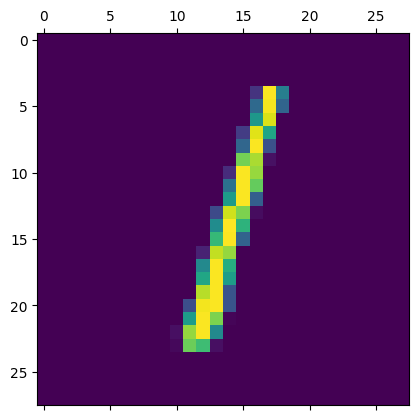

In [ ]:
plt.matshow(x_test[2])

In [ ]:
predicted_array = [ np.argmax(i) for i in prediction ]
predicted_array[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_array)

Text(50.722222222222214, 0.5, 'Original')

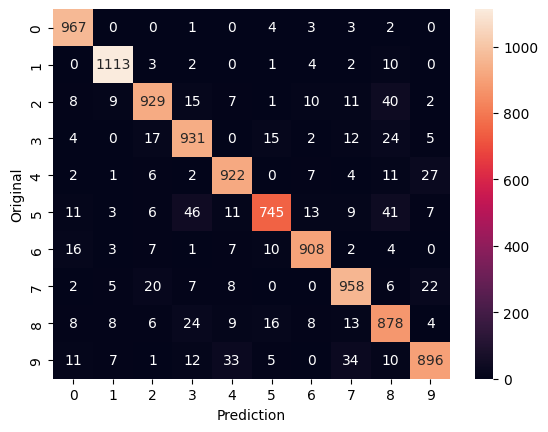

In [ ]:
import seaborn as sb
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Original')

Performance Boost

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1785 - accuracy: 0.9459
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0812 - accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0456 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0377 - accuracy: 0.9880


In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0976 - accuracy: 0.9763


[0.09757615625858307, 0.9763000011444092]

In [ ]:
prediction = model.predict(x_test_flatten)

313/313 [==============================] - 2s 6ms/step


In [ ]:
predicted_array = [ np.argmax(i) for i in prediction ]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_array)

Text(50.722222222222214, 0.5, 'Original')

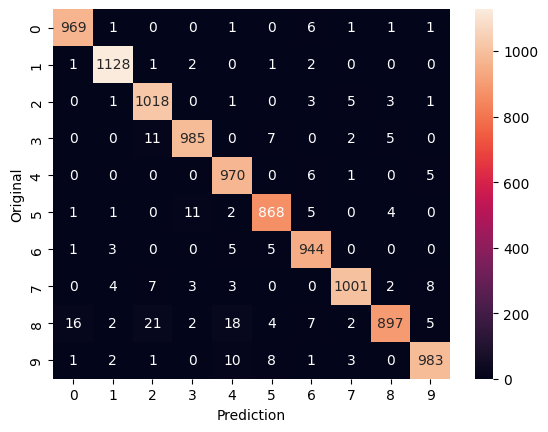

In [ ]:
import seaborn as sb
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Original')